In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

nucleus = np.load(Path("results_data/segmentation/nucleis/1_segmented.npy"))
cytoplasm = np.load(Path("results_data/segmentation/cytoplasm/1_segmented.npy"))
orig_image = imread(Path("images/1.png"))

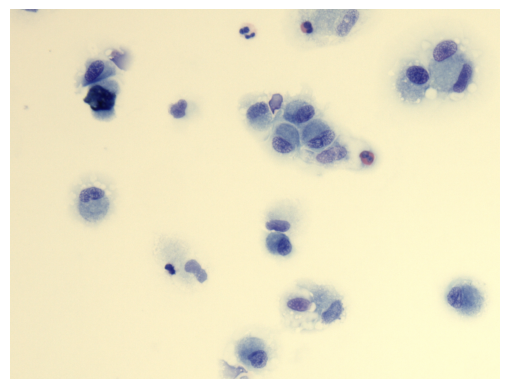

In [7]:
plt.axis("off")
plt.imshow(orig_image)

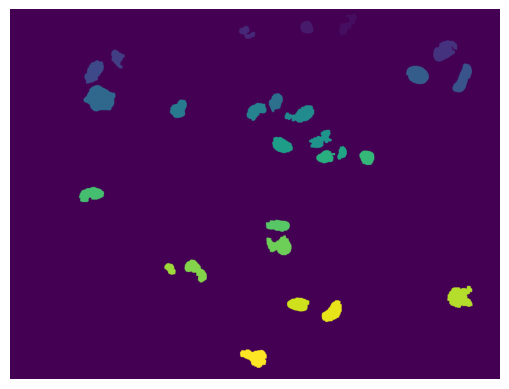

In [8]:
from skimage.measure import label

nucleus = label(nucleus)

plt.axis("off")
plt.imshow(nucleus)

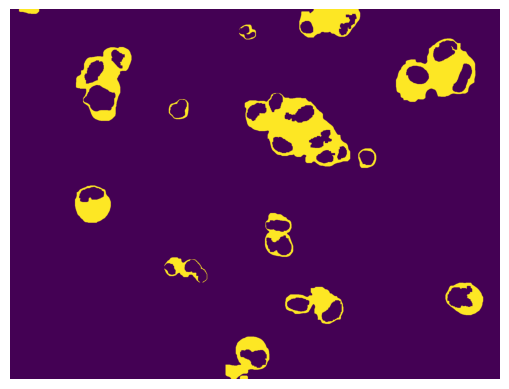

In [9]:
cytoplasm_no_nucleus = cytoplasm.copy()
cytoplasm_no_nucleus[nucleus > 0] = 0

plt.axis("off")
plt.imshow(cytoplasm_no_nucleus)

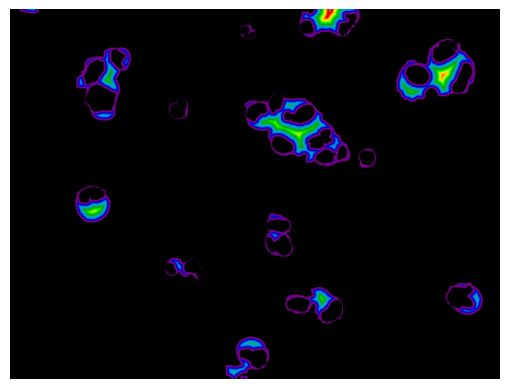

In [10]:
from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(cytoplasm_no_nucleus)

plt.axis("off")
plt.imshow(distance, cmap="nipy_spectral")

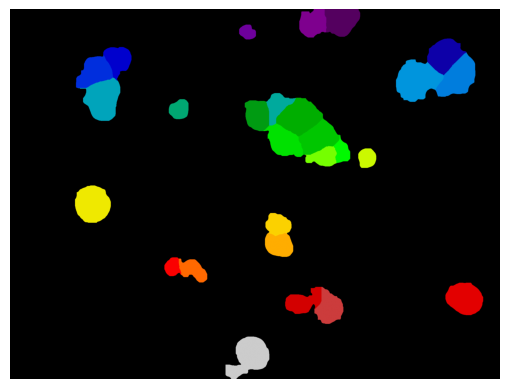

In [11]:
from skimage.segmentation import watershed

watershed_img = watershed(-distance, markers=nucleus, mask=cytoplasm)


plt.axis("off")
plt.imshow(watershed_img, cmap="nipy_spectral")

(np.float64(-0.5), np.float64(2011.5), np.float64(1517.5), np.float64(-0.5))

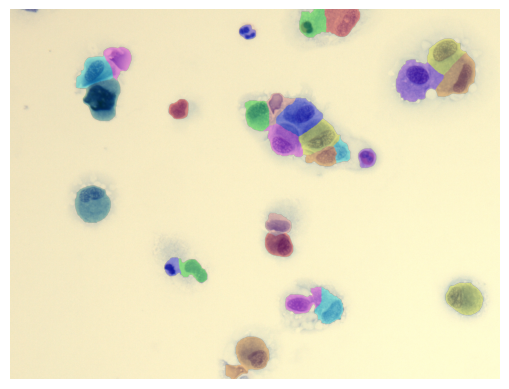

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

orig_image_normalized = (orig_image - orig_image.min()) / (
    orig_image.max() - orig_image.min()
)

labels = np.unique(watershed_img)
labels = labels[labels != 0]
n_labels = len(labels)

distinct_colors = [
    [1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [1.0, 1.0, 0.0],
    [1.0, 0.0, 1.0],
    [0.0, 1.0, 1.0],
    [1.0, 0.5, 0.0],
    [0.5, 0.0, 1.0],
    [0.0, 0.5, 0.5],
    [1.0, 0.5, 0.5],
]

colors = [distinct_colors[i % len(distinct_colors)] for i in range(n_labels)]

colors.insert(0, [0, 0, 0, 0])

cmap = ListedColormap(colors)


plt.imshow(orig_image_normalized, cmap="gray")
plt.imshow(watershed_img, cmap=cmap, alpha=0.3)

# Turn off the axis
plt.axis("off")